In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # scikitlearn uses numpy arrays
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler


from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 

import warnings

warnings.filterwarnings('ignore')

### Data Cleaning

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [4]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train.shape

(1168, 81)

In [8]:
train.isnull().sum(axis = 0)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
train.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [10]:
train_nan = train[train.columns[train.isna().any()]]
train_nan

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,NaN,None,0.0,Gd,TA,No,ALQ,Unf,TA,Attchd,1977.0,RFn,TA,TA,NaN,NaN,NaN
1,95.0,NaN,None,0.0,TA,Gd,Gd,ALQ,Rec,TA,Attchd,1970.0,Unf,TA,TA,NaN,NaN,NaN
2,92.0,NaN,None,0.0,Gd,TA,Av,GLQ,Unf,TA,Attchd,1997.0,Unf,TA,TA,NaN,NaN,NaN
3,105.0,NaN,BrkFace,480.0,Gd,TA,No,BLQ,Unf,TA,Attchd,1977.0,RFn,TA,TA,NaN,MnPrv,NaN
4,NaN,NaN,Stone,126.0,Gd,TA,No,ALQ,Unf,TA,Attchd,1977.0,Fin,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,NaN,NaN,BrkFace,31.0,TA,TA,No,BLQ,Unf,NaN,Detchd,1970.0,Unf,TA,TA,NaN,MnPrv,NaN
1164,67.0,NaN,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Detchd,2002.0,Fin,TA,TA,NaN,MnPrv,NaN
1165,24.0,NaN,None,0.0,Gd,TA,No,ALQ,Unf,TA,Attchd,1976.0,Unf,TA,TA,NaN,NaN,NaN
1166,50.0,Pave,None,0.0,TA,TA,No,Unf,Unf,NaN,Detchd,1920.0,Unf,TA,Fa,NaN,MnPrv,NaN


In [11]:
train_nan.isnull().sum(axis = 0)

LotFrontage      214
Alley           1091
MasVnrType         7
MasVnrArea         7
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
FireplaceQu      551
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1161
Fence            931
MiscFeature     1124
dtype: int64

### Lot Frontage

In [12]:
train['LotFrontage'] = train['LotFrontage'].fillna((train['LotFrontage'].mean()))

### Alley

In [13]:
# NA 	No alley access, according to the documentation

In [14]:
train.Alley = train.Alley.fillna('NA')

### MasVnrType & Area Masonry veneer type

In [15]:
train[['MasVnrType']] = train[['MasVnrType']].fillna('None') #In the data description 'None' for None
train[['MasVnrArea']] = train[['MasVnrArea']].fillna(0)

## Basement features

In [16]:
# NA	No Basement, according to the documentation

In [17]:
train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] .fillna('NA')

### FireplaceQu 

In [18]:
# NA	No Fireplace, according to the documentation

In [19]:
train.FireplaceQu = train.FireplaceQu.fillna('NA')

## Garage (fillna)

In [20]:
train.GarageYrBlt

0       1977.0
1       1970.0
2       1997.0
3       1977.0
4       1977.0
         ...  
1163    1970.0
1164    2002.0
1165    1976.0
1166    1920.0
1167    2002.0
Name: GarageYrBlt, Length: 1168, dtype: float64

In [21]:
train[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = train[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] .fillna('NA')

In [22]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)

## Pool

In [23]:
# NA	No Pool, according to the documentation

In [24]:
train['PoolQC'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: PoolQC, dtype: object

In [25]:
train['PoolQC'].value_counts(dropna=False)

NaN    1161
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

In [26]:
train.PoolQC = train.PoolQC.fillna('NA')

In [27]:
train['PoolQC'].value_counts()

NA    1161
Gd       3
Ex       2
Fa       2
Name: PoolQC, dtype: int64

### Fence

In [28]:
# NA	No Fence, according to the documentation

In [29]:
train.Fence = train.Fence.fillna('NA')

### MiscFeature

In [30]:
# NA	None, according to the documentation

In [31]:
train.MiscFeature = train.MiscFeature.fillna('NA')

******************************************************************************************************

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          1168 non-null   object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

### Test Dataset

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [34]:
train['LotShape']

0       IR1
1       IR1
2       IR1
3       IR1
4       IR1
       ... 
1163    IR1
1164    Reg
1165    Reg
1166    Reg
1167    IR1
Name: LotShape, Length: 1168, dtype: object

In [35]:
test_nan = test[test.columns[test.isna().any()]]
test_nan

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,86.0,NaN,Stone,200.0,Ex,TA,Gd,GLQ,Unf,SBrkr,Gd,Attchd,2005.0,Fin,TA,TA,NaN,NaN,NaN
1,NaN,NaN,None,0.0,Gd,TA,Av,GLQ,Unf,SBrkr,Ex,Attchd,1984.0,RFn,TA,TA,NaN,NaN,NaN
2,NaN,NaN,None,0.0,Gd,TA,Av,Unf,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,75.0,NaN,None,0.0,TA,TA,No,Rec,Unf,SBrkr,Gd,Attchd,1941.0,Unf,TA,TA,NaN,NaN,NaN
4,86.0,NaN,Stone,74.0,Gd,TA,Mn,Unf,Unf,SBrkr,Gd,BuiltIn,2007.0,Fin,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,78.0,NaN,Stone,468.0,Gd,TA,No,GLQ,Unf,SBrkr,Gd,Attchd,2007.0,RFn,TA,TA,NaN,NaN,NaN
288,57.0,NaN,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Detchd,1996.0,Unf,TA,TA,NaN,NaN,NaN
289,NaN,NaN,BrkFace,180.0,TA,TA,No,ALQ,Unf,SBrkr,TA,Attchd,1970.0,Fin,TA,TA,NaN,NaN,Shed
290,50.0,NaN,None,0.0,TA,TA,No,ALQ,Unf,SBrkr,Gd,Detchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [36]:
test_nan.isnull().sum(axis = 0)

LotFrontage      45
Alley           278
MasVnrType        1
MasVnrArea        1
BsmtQual          7
BsmtCond          7
BsmtExposure      7
BsmtFinType1      7
BsmtFinType2      7
Electrical        1
FireplaceQu     139
GarageType       17
GarageYrBlt      17
GarageFinish     17
GarageQual       17
GarageCond       17
PoolQC          292
Fence           248
MiscFeature     282
dtype: int64

#### Lot Frontage

In [37]:
test['LotFrontage'] = test['LotFrontage'].fillna((test['LotFrontage'].mean()))

#### Alley

In [38]:
test['Alley'] = test['Alley'].fillna('NA')

#### Basement

In [39]:
test[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = test[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('NA')

#### Garage

In [40]:
test[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = test[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('NA')

#### Masonry veneer area in square feet

In [41]:
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

In [42]:
test['MasVnrType'] = test['MasVnrType'].fillna('None')

#### Garage Year Built

In [43]:
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)

#### Electrical 

In [44]:
test['Electrical'] = test['Electrical'].fillna('SBrkr')

#### Fence

In [45]:
test.Fence = test.Fence.fillna('NA')

#### Misc

In [46]:
test[['PoolQC', 'Fence', 'MiscFeature']] = test[['PoolQC', 'Fence', 'MiscFeature']].fillna('NA')

#### Fireplace

In [47]:
test['FireplaceQu'] = test['FireplaceQu'].fillna('NA')

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    292 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          292 non-null    object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

### Exploratory Data Analysis

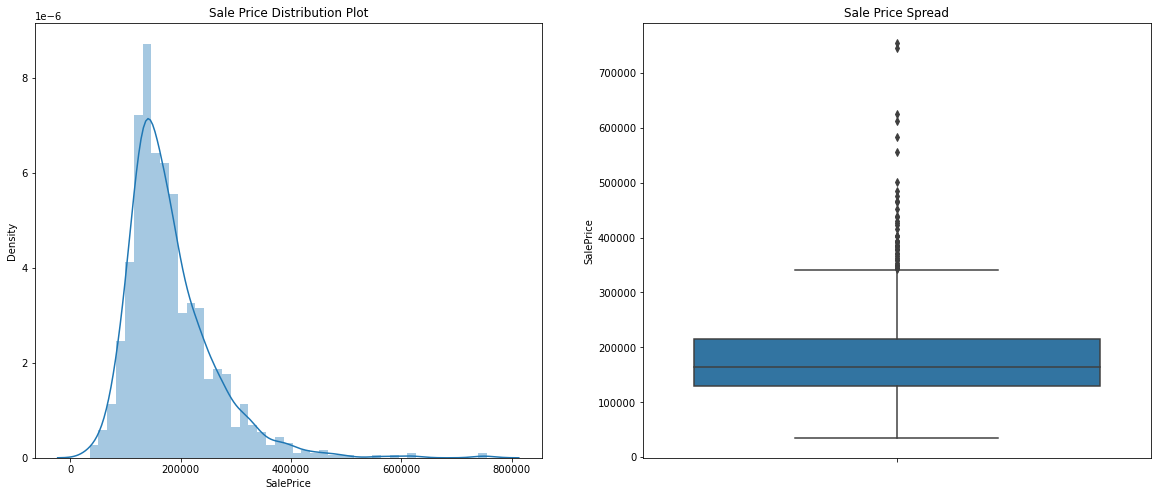

In [49]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Sale Price Distribution Plot')
sns.distplot(train.SalePrice)

plt.subplot(1,2,2)
plt.title('Sale Price Spread')
sns.boxplot(y= train['SalePrice'])

plt.show()

In [50]:
print(train['SalePrice'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
85%      251950.000000
90%      277650.000000
100%     755000.000000
max      755000.000000
Name: SalePrice, dtype: float64


1. The plot seems left skewed, meaning that the most prices in the dataset are low(Below 400,000.00)
2. No significant difference between the mean and the median of the price distribution

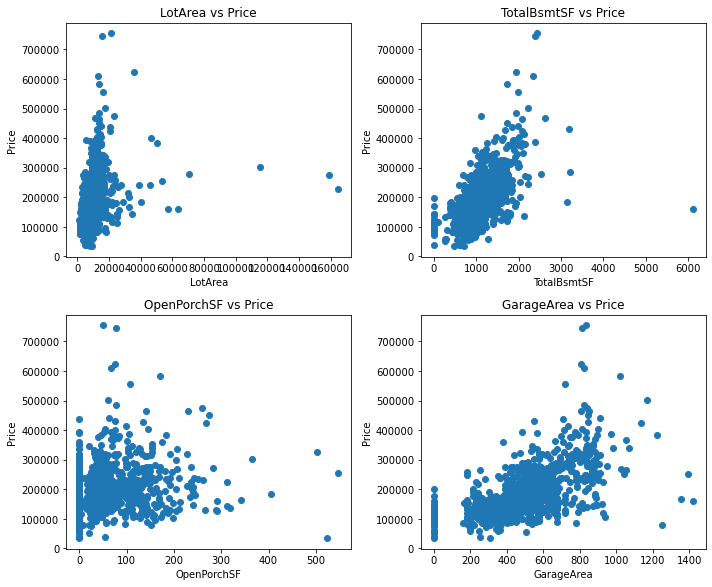

In [51]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(train[x],train['SalePrice'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('LotArea', 1)
scatter('TotalBsmtSF', 2)
scatter('OpenPorchSF', 3)
scatter('GarageArea', 4)

plt.tight_layout()

1. Sqft in general seems to have a positive correaltion with SalePrice

### Categorical Encoding

In [52]:
#Train set

In [53]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(train)
categorical_columns = categorical_columns_selector(train)

In [54]:
numerical_columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [55]:
categorical_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [56]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [57]:
train.columns = ['Id', 'MSSubClass', 'MSZoning_nom', 'LotFrontage', 'LotArea', 'Street_nom',
       'Alley_nom', 'LotShape_ord', 'LandContour_nom', 'Utilities_nom', 'LotConfig_nom',
       'LandSlope_ord', 'Neighborhood_nom', 'Condition1_nom', 'Condition2_nom', 'BldgType_nom',
       'HouseStyle_nom', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle_nom', 'RoofMatl_nom', 'Exterior1st_nom', 'Exterior2nd_nom', 'MasVnrType_nom',
       'MasVnrArea', 'ExterQual_ord', 'ExterCond_ord', 'Foundation_nom', 'BsmtQual_nom',
       'BsmtCond_nom', 'BsmtExposure_ord', 'BsmtFinType1_ord', 'BsmtFinSF1',
       'BsmtFinType2_ord', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating_nom',
       'HeatingQC_ord', 'CentralAir_nom', 'Electrical_nom', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual_ord',
       'TotRmsAbvGrd', 'Functional_ord', 'Fireplaces', 'FireplaceQu_ord', 'GarageType_nom',
       'GarageYrBlt', 'GarageFinish_ord', 'GarageCars', 'GarageArea', 'GarageQual_ord',
       'GarageCond_ord', 'PavedDrive_nom', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC_ord',
       'Fence_ord', 'MiscFeature_nom', 'MiscVal', 'MoSold', 'YrSold', 'SaleType_nom',
       'SaleCondition_nom', 'SalePrice']

In [58]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [59]:
test.columns = ['Id', 'MSSubClass', 'MSZoning_nom', 'LotFrontage', 'LotArea', 'Street_nom',
       'Alley_nom', 'LotShape_ord', 'LandContour_nom', 'Utilities_nom', 'LotConfig_nom',
       'LandSlope_ord', 'Neighborhood_nom', 'Condition1_nom', 'Condition2_nom', 'BldgType_nom',
       'HouseStyle_nom', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle_nom', 'RoofMatl_nom', 'Exterior1st_nom', 'Exterior2nd_nom', 'MasVnrType_nom',
       'MasVnrArea', 'ExterQual_ord', 'ExterCond_ord', 'Foundation_nom', 'BsmtQual_nom',
       'BsmtCond_nom', 'BsmtExposure_ord', 'BsmtFinType1_ord', 'BsmtFinSF1',
       'BsmtFinType2_ord', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating_nom',
       'HeatingQC_ord', 'CentralAir_nom', 'Electrical_nom', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual_ord',
       'TotRmsAbvGrd', 'Functional_ord', 'Fireplaces', 'FireplaceQu_ord', 'GarageType_nom',
       'GarageYrBlt', 'GarageFinish_ord', 'GarageCars', 'GarageArea', 'GarageQual_ord',
       'GarageCond_ord', 'PavedDrive_nom', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC_ord',
       'Fence_ord', 'MiscFeature_nom', 'MiscVal', 'MoSold', 'YrSold', 'SaleType_nom',
       'SaleCondition_nom']

In [60]:
ordinals = [c for c in train.columns if 'ord' in c]
nominals = [c for c in train.columns if 'nom' in c]

<AxesSubplot:xlabel='SalePrice', ylabel='count'>

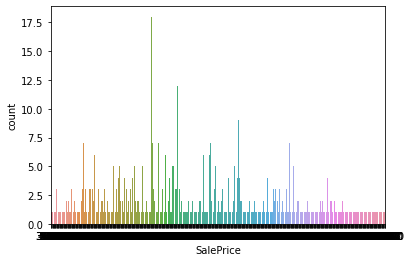

In [61]:
tr_orig = train.copy()
ts_orig = test.copy()

sns.countplot(train.SalePrice)

In [62]:
cats = nominals +ordinals

def analyse_cats(df, cat_cols):
    d = pd.DataFrame()
    cl = [];u = [];s =[]; nans =[]
    for c in cat_cols:
        #print("column:" , c ,"--Uniques:" , train[c].unique(), "--Cardinality:", train[c].unique().size)
        cl.append(c); u.append(df[c].unique());s.append(df[c].unique().size);nans.append(df[c].isnull().sum())
        
    d['"feat"'] = cl;d["uniques"] = u; d["cardinality"] = s; d["nans"] = nans
    return d

plt.style.use('fivethirtyeight')
catanadf = analyse_cats(train, cats)
catanadf

,"""feat""",uniques,cardinality,nans
0,MSZoning_nom,"[RL, RM, FV, RH, C (all)]",5,0
1,Street_nom,"[Pave, Grvl]",2,0
2,Alley_nom,"[NA, Grvl, Pave]",3,0
3,LandContour_nom,"[Lvl, Bnk, HLS, Low]",4,0
4,Utilities_nom,[AllPub],1,0
5,LotConfig_nom,"[Inside, CulDSac, FR2, Corner, FR3]",5,0
6,Neighborhood_nom,"[NPkVill, NAmes, NoRidge, NWAmes, Gilbert, Saw...",25,0
7,Condition1_nom,"[Norm, Feedr, RRAn, PosA, RRAe, Artery, PosN, ...",9,0
8,Condition2_nom,"[Norm, RRAe, Feedr, PosN, Artery, RRNn, PosA, ...",8,0
9,BldgType_nom,"[TwnhsE, 1Fam, Duplex, Twnhs, 2fmCon]",5,0


### Label Encoding, Ordinal Encoding

In [63]:
test

,Id,MSSubClass,MSZoning_nom,LotFrontage,LotArea,Street_nom,Alley_nom,LotShape_ord,LandContour_nom,Utilities_nom,...,ScreenPorch,PoolArea,PoolQC_ord,Fence_ord,MiscFeature_nom,MiscVal,MoSold,YrSold,SaleType_nom,SaleCondition_nom
0,337,20,RL,86.000000,14157,Pave,NA,IR1,HLS,AllPub,...,0,0,NA,NA,NA,0,7,2007,WD,Normal
1,1018,120,RL,66.425101,5814,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,8,2009,COD,Abnorml
2,929,20,RL,66.425101,11838,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2009,WD,Normal
3,1148,70,RL,75.000000,12000,Pave,NA,Reg,Bnk,AllPub,...,0,0,NA,NA,NA,0,7,2009,WD,Normal
4,1227,60,RL,86.000000,14598,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.000000,10206,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,10,2008,WD,Normal
288,1048,20,RL,57.000000,9245,Pave,NA,IR2,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
289,17,20,RL,66.425101,11241,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.000000,5000,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,10,2006,WD,Normal


In [64]:
train = tr_orig.copy()
test = ts_orig.copy()
del train['Id']
del test['Id']

In [65]:
for c in ordinals:
    print(c,list(train[c].unique()))

LotShape_ord ['IR1', 'Reg', 'IR2', 'IR3']
LandSlope_ord ['Gtl', 'Mod', 'Sev']
ExterQual_ord ['TA', 'Gd', 'Ex', 'Fa']
ExterCond_ord ['TA', 'Gd', 'Fa', 'Po', 'Ex']
BsmtExposure_ord ['No', 'Gd', 'Av', 'Mn', 'NA']
BsmtFinType1_ord ['ALQ', 'GLQ', 'BLQ', 'Unf', 'Rec', 'LwQ', 'NA']
BsmtFinType2_ord ['Unf', 'Rec', 'BLQ', 'GLQ', 'NA', 'ALQ', 'LwQ']
HeatingQC_ord ['TA', 'Ex', 'Gd', 'Fa', 'Po']
KitchenQual_ord ['TA', 'Gd', 'Ex', 'Fa']
Functional_ord ['Typ', 'Mod', 'Maj1', 'Min1', 'Min2', 'Sev', 'Maj2']
FireplaceQu_ord ['TA', 'Gd', 'NA', 'Fa', 'Ex', 'Po']
GarageFinish_ord ['RFn', 'Unf', 'Fin', 'NA']
GarageQual_ord ['TA', 'Fa', 'NA', 'Gd', 'Ex', 'Po']
GarageCond_ord ['TA', 'Fa', 'Gd', 'NA', 'Po', 'Ex']
PoolQC_ord ['NA', 'Ex', 'Gd', 'Fa']
Fence_ord ['NA', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw']


#### Ordinal encoding

In [66]:
def OrdMapping(df):
    
    LotShape_ord_mapping = {'IR1':2, 'Reg':3, 'IR3':0, 'IR2':1}
    LandSlope_ord_mapping =  {'Gtl':2, 'Mod':1, 'Sev':0}
    ExterQual_ord_mapping =  {'TA':1, 'Gd':2, 'Ex':3, 'Fa':0}
    ExterCond_ord_mapping =  {'TA':1, 'Gd':2, 'Fa':1, 'Po':0, 'Ex':4}
    BsmtExposure_ord_mapping =  {'No':1, 'Gd':4, 'Av':3, 'Mn':2, 'NA':0}
    BsmtFinType1_ord_mapping =  {'ALQ':5, 'GLQ':6, 'BLQ':4, 'Unf':1, 'Rec':3, 'LwQ':2, 'NA':0}
    BsmtFinType2_ord_mapping =  {'Unf':1, 'Rec':3, 'BLQ':4, 'GLQ':6, 'NA':0, 'ALQ':5, 'LwQ':2}
    HeatingQC_ord_mapping =  {'TA':2, 'Ex':4, 'Gd':3, 'Fa':1, 'Po':0}
    KitchenQual_ord_mapping =  {'TA':1, 'Gd':2, 'Ex':3, 'Fa':0}
    Functional_ord_mapping =  {'Typ':6, 'Mod':3, 'Maj1':2, 'Min1':5, 'Min2':4, 'Sev':0, 'Maj2':1}
    FireplaceQu_ord_mapping =  {'TA':3, 'Gd':4, 'NA':0, 'Fa':1, 'Ex':5, 'Po':2}
    GarageFinish_ord_mapping =  {'RFn':2, 'Unf':1, 'Fin':3, 'NA':0}
    GarageQual_ord_mapping =  {'TA':3, 'Fa':2, 'NA':0, 'Gd':4, 'Ex':5, 'Po':1}
    GarageCond_ord_mapping =  {'TA':3, 'Fa':3, 'Gd':4, 'NA':0, 'Po':1, 'Ex':5}
    PoolQC_ord_mapping =  {'NA':0, 'Ex':2, 'Gd':2, 'Fa':1}
    Fence_ord_mapping =  {'NA':0, 'MnPrv':3, 'GdPrv':4, 'GdWo':2, 'MnWw':1}
    
    
   
    df['LotShape_ord'] = df.LotShape_ord.map(LotShape_ord_mapping)
    df['LandSlope_ord'] = df.LandSlope_ord.map(LandSlope_ord_mapping)
    df['ExterQual_ord'] = df.ExterQual_ord.map(ExterQual_ord_mapping)
    df['ExterCond_ord'] = df.ExterCond_ord.map(ExterCond_ord_mapping)
    df['BsmtExposure_ord'] = df.BsmtExposure_ord.map(BsmtExposure_ord_mapping)
    df['BsmtFinType1_ord'] = df.BsmtFinType1_ord.map(BsmtFinType1_ord_mapping)
    df['BsmtFinType2_ord'] = df.BsmtFinType2_ord.map(BsmtFinType2_ord_mapping)
    df['HeatingQC_ord'] = df.HeatingQC_ord.map(HeatingQC_ord_mapping)
    df['KitchenQual_ord'] = df.KitchenQual_ord.map(KitchenQual_ord_mapping)
    df['Functional_ord'] = df.Functional_ord.map(Functional_ord_mapping)
    df['FireplaceQu_ord'] = df.FireplaceQu_ord.map(FireplaceQu_ord_mapping)
    df['GarageFinish_ord'] = df.GarageFinish_ord.map(GarageFinish_ord_mapping)
    df['GarageQual_ord'] = df.GarageQual_ord.map(GarageQual_ord_mapping)
    df['GarageCond_ord'] = df.GarageCond_ord.map(GarageCond_ord_mapping)
    df['PoolQC_ord'] = df.PoolQC_ord.map(PoolQC_ord_mapping)
    df['Fence_ord'] = df.Fence_ord.map(Fence_ord_mapping)
    
    
    return df

train = OrdMapping(train)
test = OrdMapping(test)

In [67]:
train

,MSSubClass,MSZoning_nom,LotFrontage,LotArea,Street_nom,Alley_nom,LotShape_ord,LandContour_nom,Utilities_nom,LotConfig_nom,...,PoolArea,PoolQC_ord,Fence_ord,MiscFeature_nom,MiscVal,MoSold,YrSold,SaleType_nom,SaleCondition_nom,SalePrice
0,120,RL,70.98847,4928,Pave,NA,2,Lvl,AllPub,Inside,...,0,0,0,NA,0,2,2007,WD,Normal,128000
1,20,RL,95.00000,15865,Pave,NA,2,Lvl,AllPub,Inside,...,0,0,0,NA,0,10,2007,WD,Normal,268000
2,60,RL,92.00000,9920,Pave,NA,2,Lvl,AllPub,CulDSac,...,0,0,0,NA,0,6,2007,WD,Normal,269790
3,20,RL,105.00000,11751,Pave,NA,2,Lvl,AllPub,Inside,...,0,0,3,NA,0,1,2010,COD,Normal,190000
4,20,RL,70.98847,16635,Pave,NA,2,Lvl,AllPub,FR2,...,0,0,0,NA,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,70.98847,9819,Pave,NA,2,Lvl,AllPub,Inside,...,0,0,3,NA,0,2,2010,WD,Normal,122000
1164,20,RL,67.00000,8777,Pave,NA,3,Lvl,AllPub,Inside,...,0,0,3,NA,0,5,2009,WD,Normal,108000
1165,160,RL,24.00000,2280,Pave,NA,3,Lvl,AllPub,FR2,...,0,0,0,NA,0,7,2009,WD,Normal,148500
1166,70,C (all),50.00000,8500,Pave,Pave,3,Lvl,AllPub,Inside,...,0,0,3,NA,0,7,2008,WD,Normal,40000


In [68]:
test

,MSSubClass,MSZoning_nom,LotFrontage,LotArea,Street_nom,Alley_nom,LotShape_ord,LandContour_nom,Utilities_nom,LotConfig_nom,...,ScreenPorch,PoolArea,PoolQC_ord,Fence_ord,MiscFeature_nom,MiscVal,MoSold,YrSold,SaleType_nom,SaleCondition_nom
0,20,RL,86.000000,14157,Pave,NA,2,HLS,AllPub,Corner,...,0,0,0,0,NA,0,7,2007,WD,Normal
1,120,RL,66.425101,5814,Pave,NA,2,Lvl,AllPub,CulDSac,...,0,0,0,0,NA,0,8,2009,COD,Abnorml
2,20,RL,66.425101,11838,Pave,NA,3,Lvl,AllPub,Inside,...,0,0,0,0,NA,0,6,2009,WD,Normal
3,70,RL,75.000000,12000,Pave,NA,3,Bnk,AllPub,Inside,...,0,0,0,0,NA,0,7,2009,WD,Normal
4,60,RL,86.000000,14598,Pave,NA,2,Lvl,AllPub,CulDSac,...,0,0,0,0,NA,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,RL,78.000000,10206,Pave,NA,3,Lvl,AllPub,Inside,...,0,0,0,0,NA,0,10,2008,WD,Normal
288,20,RL,57.000000,9245,Pave,NA,1,Lvl,AllPub,Inside,...,0,0,0,0,NA,0,2,2008,WD,Normal
289,20,RL,66.425101,11241,Pave,NA,2,Lvl,AllPub,CulDSac,...,0,0,0,0,Shed,700,3,2010,WD,Normal
290,50,RM,50.000000,5000,Pave,NA,3,Lvl,AllPub,Corner,...,0,0,0,0,NA,0,10,2006,WD,Normal


#### Nominal encoding-train1&test1

In [69]:
for c in nominals:
    le = LabelEncoder()
    le.fit(list(train[c].astype(str)) + list(test[c].astype(str)))
    train[c] = le.transform(train[c].astype(str))
    test[c] = le.transform(test[c].astype(str))
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('target mapping :  ',c ,  le_name_mapping)

target mapping :   MSZoning_nom {'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4}
target mapping :   Street_nom {'Grvl': 0, 'Pave': 1}
target mapping :   Alley_nom {'Grvl': 0, 'NA': 1, 'Pave': 2}
target mapping :   LandContour_nom {'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3}
target mapping :   Utilities_nom {'AllPub': 0, 'NoSeWa': 1}
target mapping :   LotConfig_nom {'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4}
target mapping :   Neighborhood_nom {'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5, 'Crawfor': 6, 'Edwards': 7, 'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11, 'NAmes': 12, 'NPkVill': 13, 'NWAmes': 14, 'NoRidge': 15, 'NridgHt': 16, 'OldTown': 17, 'SWISU': 18, 'Sawyer': 19, 'SawyerW': 20, 'Somerst': 21, 'StoneBr': 22, 'Timber': 23, 'Veenker': 24}
target mapping :   Condition1_nom {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'PosA': 3, 'PosN': 4, 'RRAe': 5, 'RRAn': 6, 'RRNe': 7, 'RRNn': 8}
target mapping :   Condition2_nom {'Artery'

In [70]:
train

,MSSubClass,MSZoning_nom,LotFrontage,LotArea,Street_nom,Alley_nom,LotShape_ord,LandContour_nom,Utilities_nom,LotConfig_nom,...,PoolArea,PoolQC_ord,Fence_ord,MiscFeature_nom,MiscVal,MoSold,YrSold,SaleType_nom,SaleCondition_nom,SalePrice
0,120,3,70.98847,4928,1,1,2,3,0,4,...,0,0,0,1,0,2,2007,8,4,128000
1,20,3,95.00000,15865,1,1,2,3,0,4,...,0,0,0,1,0,10,2007,8,4,268000
2,60,3,92.00000,9920,1,1,2,3,0,1,...,0,0,0,1,0,6,2007,8,4,269790
3,20,3,105.00000,11751,1,1,2,3,0,4,...,0,0,3,1,0,1,2010,0,4,190000
4,20,3,70.98847,16635,1,1,2,3,0,2,...,0,0,0,1,0,6,2009,8,4,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,3,70.98847,9819,1,1,2,3,0,4,...,0,0,3,1,0,2,2010,8,4,122000
1164,20,3,67.00000,8777,1,1,3,3,0,4,...,0,0,3,1,0,5,2009,8,4,108000
1165,160,3,24.00000,2280,1,1,3,3,0,2,...,0,0,0,1,0,7,2009,8,4,148500
1166,70,0,50.00000,8500,1,2,3,3,0,4,...,0,0,3,1,0,7,2008,8,4,40000


In [71]:
test

,MSSubClass,MSZoning_nom,LotFrontage,LotArea,Street_nom,Alley_nom,LotShape_ord,LandContour_nom,Utilities_nom,LotConfig_nom,...,ScreenPorch,PoolArea,PoolQC_ord,Fence_ord,MiscFeature_nom,MiscVal,MoSold,YrSold,SaleType_nom,SaleCondition_nom
0,20,3,86.000000,14157,1,1,2,1,0,0,...,0,0,0,0,1,0,7,2007,8,4
1,120,3,66.425101,5814,1,1,2,3,0,1,...,0,0,0,0,1,0,8,2009,0,0
2,20,3,66.425101,11838,1,1,3,3,0,4,...,0,0,0,0,1,0,6,2009,8,4
3,70,3,75.000000,12000,1,1,3,0,0,4,...,0,0,0,0,1,0,7,2009,8,4
4,60,3,86.000000,14598,1,1,2,3,0,1,...,0,0,0,0,1,0,1,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,3,78.000000,10206,1,1,3,3,0,4,...,0,0,0,0,1,0,10,2008,8,4
288,20,3,57.000000,9245,1,1,1,3,0,4,...,0,0,0,0,1,0,2,2008,8,4
289,20,3,66.425101,11241,1,1,2,3,0,1,...,0,0,0,0,3,700,3,2010,8,4
290,50,4,50.000000,5000,1,1,3,3,0,0,...,0,0,0,0,1,0,10,2006,8,4


### Feature Selection

In [74]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood_nom', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st_nom', 'Exterior2nd_nom', 'MasVnrArea', 'BsmtExposure_ord', 'BsmtFinType1_ord', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageFinish_ord', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold']
[0.01337119 0.00667442 0.03236413 0.03878874 0.00034464 0.00380944
 0.0111778  0.00559247 0.         0.010844   0.00341112 0.02407329
 0.01004171 0.00160582 0.00548576 0.01109805 0.01745996 0.01381559
 0.03040095 0.02854918 0.00824322 0.00128713 0.01710226 0.01834869
 0.0114527  0.01999798 0.00717196 0.00476811 0.00906939 0.00898562
 0.00600288 0.01299551 0.01610137 0.02796017 0.00780203 0.00875375
 0.03376921 0.03380995 0.00224384 0.01189933 0.00246657 0.00438056
 0.03748116 0.0185246  0.00270268 0.03700657 0.00985237 0.00368322
 0.00641068 0.00727846 0.01294206 0.0020256

In [70]:
features = train[['MSSubClass','LotFrontage', 'LotArea', 'Neighborhood_nom', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st_nom', 'Exterior2nd_nom', 'MasVnrArea', 'BsmtExposure_ord', 'BsmtFinType1_ord', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageFinish_ord', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold']]
target = train['SalePrice']

In [71]:
# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
########################################
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Regression Models

#### Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [73]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.666740134146891
R2_score (train):  0.7973084962425846
R2_score (test):  0.8089847130415191
RMSE:  33421.07932364992


#### Ridge Regression

In [74]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=3.8))])

In [75]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.6176828062398367
R2_score (train):  0.9682539103227055
R2_score (test):  0.7563693350573111
RMSE:  37744.38764114893


#### Lasso Regression

In [76]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.012, max_iter=3000))])

In [77]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.19259012839213843
R2_score (train):  0.9698496906036157
R2_score (test):  0.6968087134613083
RMSE:  42106.07566089952


#### Decision Tree Regression

In [78]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [79]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.729386097570276
R2_score (train):  1.0
R2_score (test):  0.6622864693104661
RMSE:  44438.62770801904


#### Random Forest Regression

In [80]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=500, random_state=0)

In [82]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.8279819133930278
R2_score (train):  0.980534307274183
R2_score (test):  0.8384969360477488
RMSE:  30731.007000731195


### Measuring the error

In [83]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [84]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,33421.079324,0.797308,0.808985,0.666740
1,Ridge Regression,37744.387641,0.968254,0.756369,0.617683
2,Lasso Regression,42106.075661,0.969850,0.696809,0.192590
3,Decision Tree Regression,44438.627708,1.000000,0.662286,0.729386
4,Random Forest Regression,30731.007001,0.980534,0.838497,0.827982


#### Visualizing Model Performance

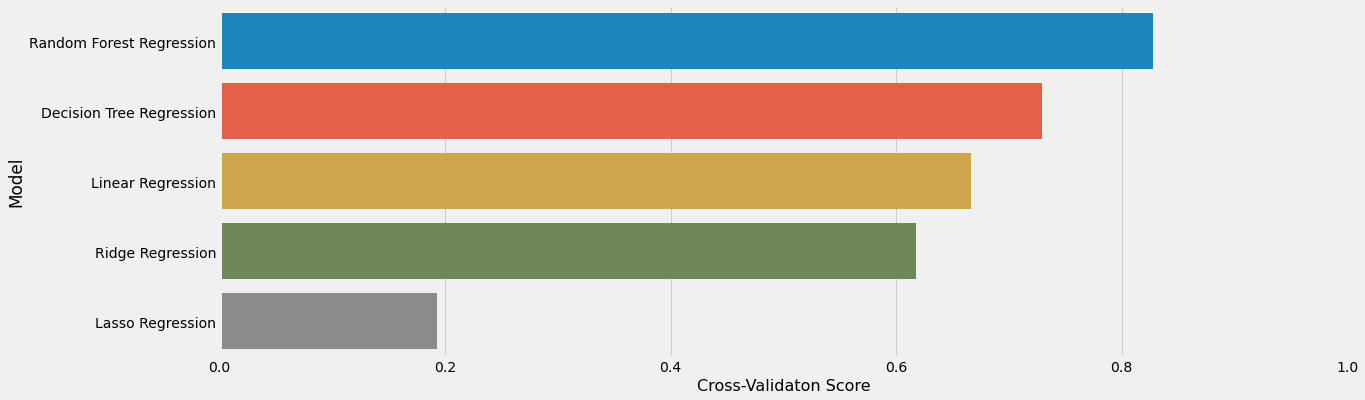

In [85]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

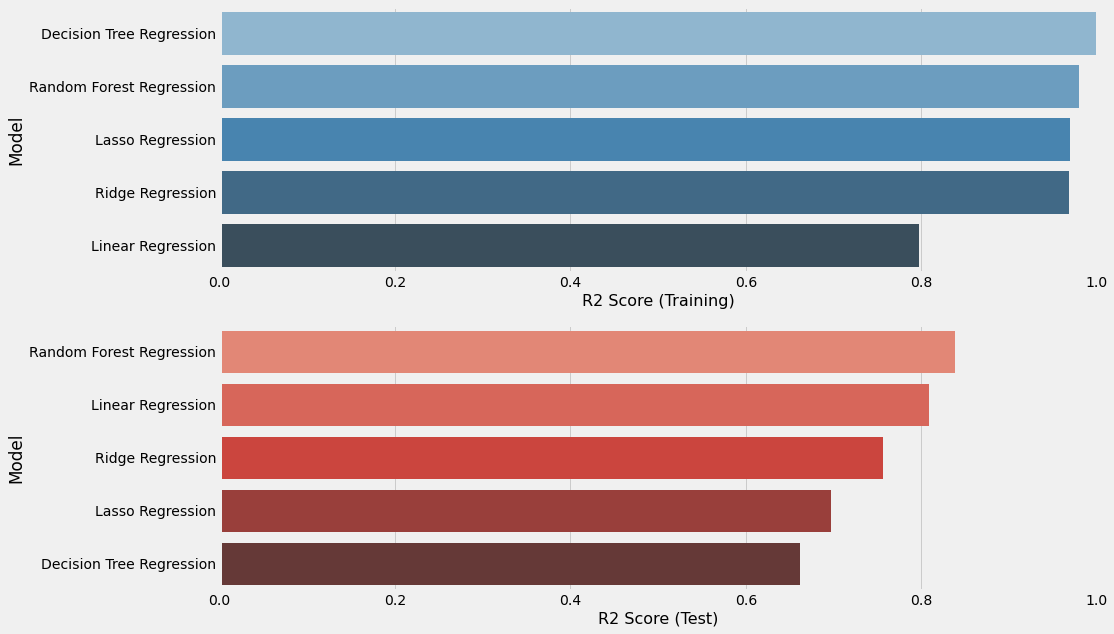

In [86]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

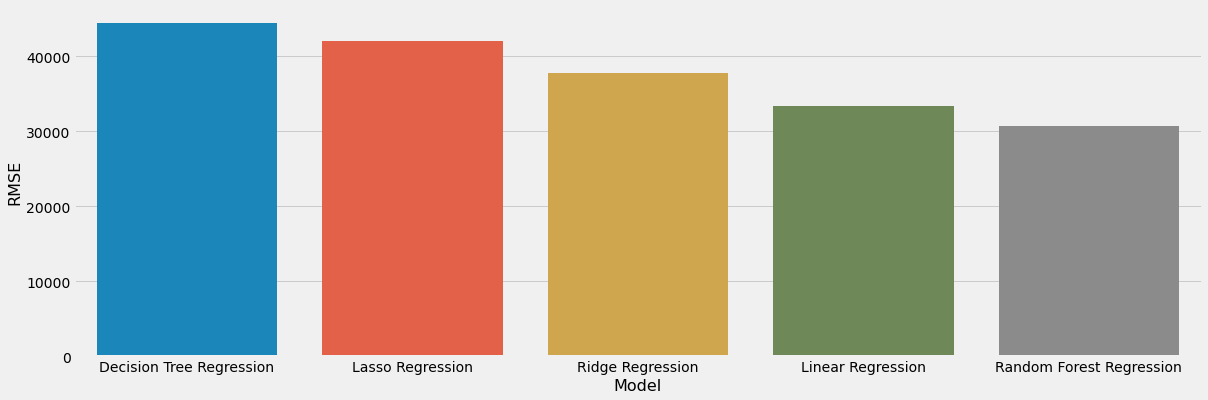

In [87]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()

### Decision Tree Regressor

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

## Comment in order to publish in kaggle.

grid_cv_dtm = GridSearchCV(regressor_dt, param_grid, cv=5)

grid_cv_dtm.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [92]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.7133938585404141
Best Hyperparameters::
{'criterion': 'mae', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}
